## Predicting the Income Level based on Various Factors: US Census Data



In this project we analyze a U.S. census data taken from the UCI (University of California at Irvine) Machine Learning Repository. The project is divided into four parts: Cleaning and Preprocessing the Data, Exploratory Data Analysis, Predictive Analysis and Theoretical Background. Our final goal is to build a model, which can predict whether the income of a random adult American citizen is less or greater than 50000$ a year based on given features, such as age, education, occupation, gender, race, etc.

## Data

Both training and test datasets are supplied along with the attribute names, have all been sourced from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/adult). Both Datasets contain 15 variables (14 descriptive and 1 target), the dataset contains 32561 rows.

Variable descriptions are given in the table below:


    Age: continuous.

    Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

    Fnlwgt: continuous.

    Education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

    Education-num: continuous. 
    
    marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

    Occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

    Relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

    Race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
    Sex: Female, Male.

    Capital-gain: continuous.

    Capital-loss: continuous.

    Hours-per-week: continuous.

    Native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


## Problem Statement:
The final goal is to build a model, which can predict whether the income of a random adult American citizen is less or greater than 50000$ a year

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objs as go
from plotly.offline import iplot

In [3]:
df = pd.read_csv("/home/daryl-loyck/Documents/datascience-projects/USIncomeLevelPrediction/adult.csv")
df.head()

39          State-gov   77516   Bachelors   13        Never-married  \
0  50   Self-emp-not-inc   83311   Bachelors   13   Married-civ-spouse   
1  38            Private  215646     HS-grad    9             Divorced   
2  53            Private  234721        11th    7   Married-civ-spouse   
3  28            Private  338409   Bachelors   13   Married-civ-spouse   
4  37            Private  284582     Masters   14   Married-civ-spouse   

         Adm-clerical   Not-in-family   White     Male   2174   0   40  \
0     Exec-managerial         Husband   White     Male      0   0   13   
1   Handlers-cleaners   Not-in-family   White     Male      0   0   40   
2   Handlers-cleaners         Husband   Black     Male      0   0   40   
3      Prof-specialty            Wife   Black   Female      0   0   40   
4     Exec-managerial            Wife   White   Female      0   0   40   

    United-States   <=50K  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K  
3            Cuba   <=50K  
4   United-States   <=50K

In [4]:
df.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

# Exploratory Data Analysis (EDA)

In [5]:
# Checking whether there is any missing values or not
df.isnull().sum()

39                0
 State-gov        0
 77516            0
 Bachelors        0
 13               0
 Never-married    0
 Adm-clerical     0
 Not-in-family    0
 White            0
 Male             0
 2174             0
 0                0
 40               0
 United-States    0
 <=50K            0
dtype: int64

In [7]:
df.drop([' 2174', ' 0', ' 40'], axis = 'columns', inplace = True)
df.head()

39          State-gov   77516   Bachelors   13        Never-married  \
0  50   Self-emp-not-inc   83311   Bachelors   13   Married-civ-spouse   
1  38            Private  215646     HS-grad    9             Divorced   
2  53            Private  234721        11th    7   Married-civ-spouse   
3  28            Private  338409   Bachelors   13   Married-civ-spouse   
4  37            Private  284582     Masters   14   Married-civ-spouse   

         Adm-clerical   Not-in-family   White     Male   United-States   <=50K  
0     Exec-managerial         Husband   White     Male   United-States   <=50K  
1   Handlers-cleaners   Not-in-family   White     Male   United-States   <=50K  
2   Handlers-cleaners         Husband   Black     Male   United-States   <=50K  
3      Prof-specialty            Wife   Black   Female            Cuba   <=50K  
4     Exec-managerial            Wife   White   Female   United-States   <=50K

In [8]:
# Since with the given name we are unable to judge what the data is indicating 
# Lets rename the columns name to understand the dataset more easily

df.columns = ['Age', 'Type_of_Owner', 'id', 'Education', 'No_of_Projects_Done', 'Marital_Status', 'Job_Designation', 'Family_Relation', 'Race', 'Gender', 'Country', 'Salary']

In [12]:
# Lets go through the data once more 
df.head()

Age      Type_of_Owner      id   Education  No_of_Projects_Done  \
0   50   Self-emp-not-inc   83311   Bachelors                   13   
1   38            Private  215646     HS-grad                    9   
2   53            Private  234721        11th                    7   
3   28            Private  338409   Bachelors                   13   
4   37            Private  284582     Masters                   14   

        Marital_Status     Job_Designation Family_Relation    Race   Gender  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

          Country  Salary  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K  
3            Cuba   <=50K  
4   United-States   <=50K

In [13]:
# Finding the shape of the data
df.shape

(32560, 12)

There is 32560 rows and 12 columns in the dataset


In [14]:
# Getting info about the datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  32560 non-null  int64 
 1   Type_of_Owner        32560 non-null  object
 2   id                   32560 non-null  int64 
 3   Education            32560 non-null  object
 4   No_of_Projects_Done  32560 non-null  int64 
 5   Marital_Status       32560 non-null  object
 6   Job_Designation      32560 non-null  object
 7   Family_Relation      32560 non-null  object
 8   Race                 32560 non-null  object
 9   Gender               32560 non-null  object
 10  Country              32560 non-null  object
 11  Salary               32560 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [15]:
# Describing the Data
df.describe()

Age            id  No_of_Projects_Done
count  32560.000000  3.256000e+04         32560.000000
mean      38.581634  1.897818e+05            10.080590
std       13.640642  1.055498e+05             2.572709
min       17.000000  1.228500e+04             1.000000
25%       28.000000  1.178315e+05             9.000000
50%       37.000000  1.783630e+05            10.000000
75%       48.000000  2.370545e+05            12.000000
max       90.000000  1.484705e+06            16.000000

Wow there is no missing values in the dataset

# Data Visualization

In [16]:
# Visualizing the Type of Sponsor Dataset

labels = df['Type_of_Owner'].value_counts().index
values = df['Type_of_Owner'].value_counts().values

colors = df['Type_of_Owner']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo="label+percent",
                               marker = dict(colors=colors))])

fig.show()

From the above dataset we can see that most of the Jobs lies in the private sector and its around 70% infact

In [17]:
# Visualizing the Type of Age Dataset

labels = df['Age'].value_counts()[:10].index
values = df['Age'].value_counts()[:10].values

colors = df['Age']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo="label+percent",
                               marker = dict(colors=colors))])

fig.show()

FRom the above dataset we can see that most of the job-seeker falls in the age-group of 30-40 

In [18]:
# Visualizing the Highest Degree of Eduaction

labels = df['Education'].value_counts().index
values = df['Education'].value_counts().values

colors = df['Education']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo="label+percent",
                               marker = dict(colors=colors))])

fig.show()

Most of the Working Class people have HS-grad degree followed by Some-College degree and Bachelors

In [19]:
# Visualizing the No_of_Projects_Done

labels = df['No_of_Projects_Done'].value_counts().index
values = df['No_of_Projects_Done'].value_counts().values

colors = df['No_of_Projects_Done']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo="label+percent",
                               marker = dict(colors=colors))])

fig.show()

Most of the People have 9 or 10 projects in their account

In [20]:
# Visualizing the Marital Status of the Working Class People

labels = df['Marital_Status'].value_counts().index
values = df['Marital_Status'].value_counts().values

colors = df['Marital_Status']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo="label+percent",
                               marker = dict(colors=colors))])

fig.show()

From the output we can see that 46% people are married and 32.8% people never get married

In [21]:
# Visualizing the Job Descriptions of the Working Class People

labels = df['Job_Designation'].value_counts().index
values = df['Job_Designation'].value_counts().values

colors = df['Job_Designation']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo="label+percent",
                               marker = dict(colors=colors))])

fig.show()

About 50% of the people are involved in Prof-speciality, Craft-repair, Exec-managerial and Adm-clerical

In [22]:
# Visualizing the Family-Relation of the Working Class People

labels = df['Family_Relation'].value_counts().index
values = df['Family_Relation'].value_counts().values

colors = df['Family_Relation']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo="label+percent",
                               marker = dict(colors=colors))])

fig.show()

Most of the working class people are Husbands and about 5% of female workers are wives


In [23]:
# Try to see the different type of race of the Working Class
df['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

There are 4 different race of the Working Class of the people

In [24]:
# Visualizing the Race of the Working Class People

labels = df['Race'].value_counts().index
values = df['Race'].value_counts().values

colors = ['#98adbf',
 '#1d4466',
 '#2678bf',
 '#2c6699']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo="label+percent",
                               marker = dict(colors=colors))])

fig.show()

From the above plot it is quite visble that White People have supermacy over the Black while getting job and Black people still face Discrimination

In [25]:
# Visualizing the Gender of the Working Class People

labels = df['Gender'].value_counts().index
values = df['Gender'].value_counts().values

colors = ['#98adbf',
 '#2c6699']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo="label+percent",
                               marker = dict(colors=colors))])

fig.show()

From the above it is visible that in the job sector, female are still lagging to get the job

In [26]:
# Visualizing the Country of the Working Class People

labels = df['Country'].value_counts().index
values = df['Country'].value_counts().values

colors = df['Country']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo="label+percent",
                               marker = dict(colors=colors))])

fig.show()

About 90% of the Working Class people are Residents of the US

In [27]:
# Visualizing the Salary of the Working Class People

labels = df['Salary'].value_counts().index
values = df['Salary'].value_counts().values

colors = ['#98adbf',
 '#2c6699']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo="label+percent",
                               marker = dict(colors=colors))])

fig.show()

Only round 24% of the people get above 50k of salary and around 76% of the people get 50k or less than 50k as salary

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


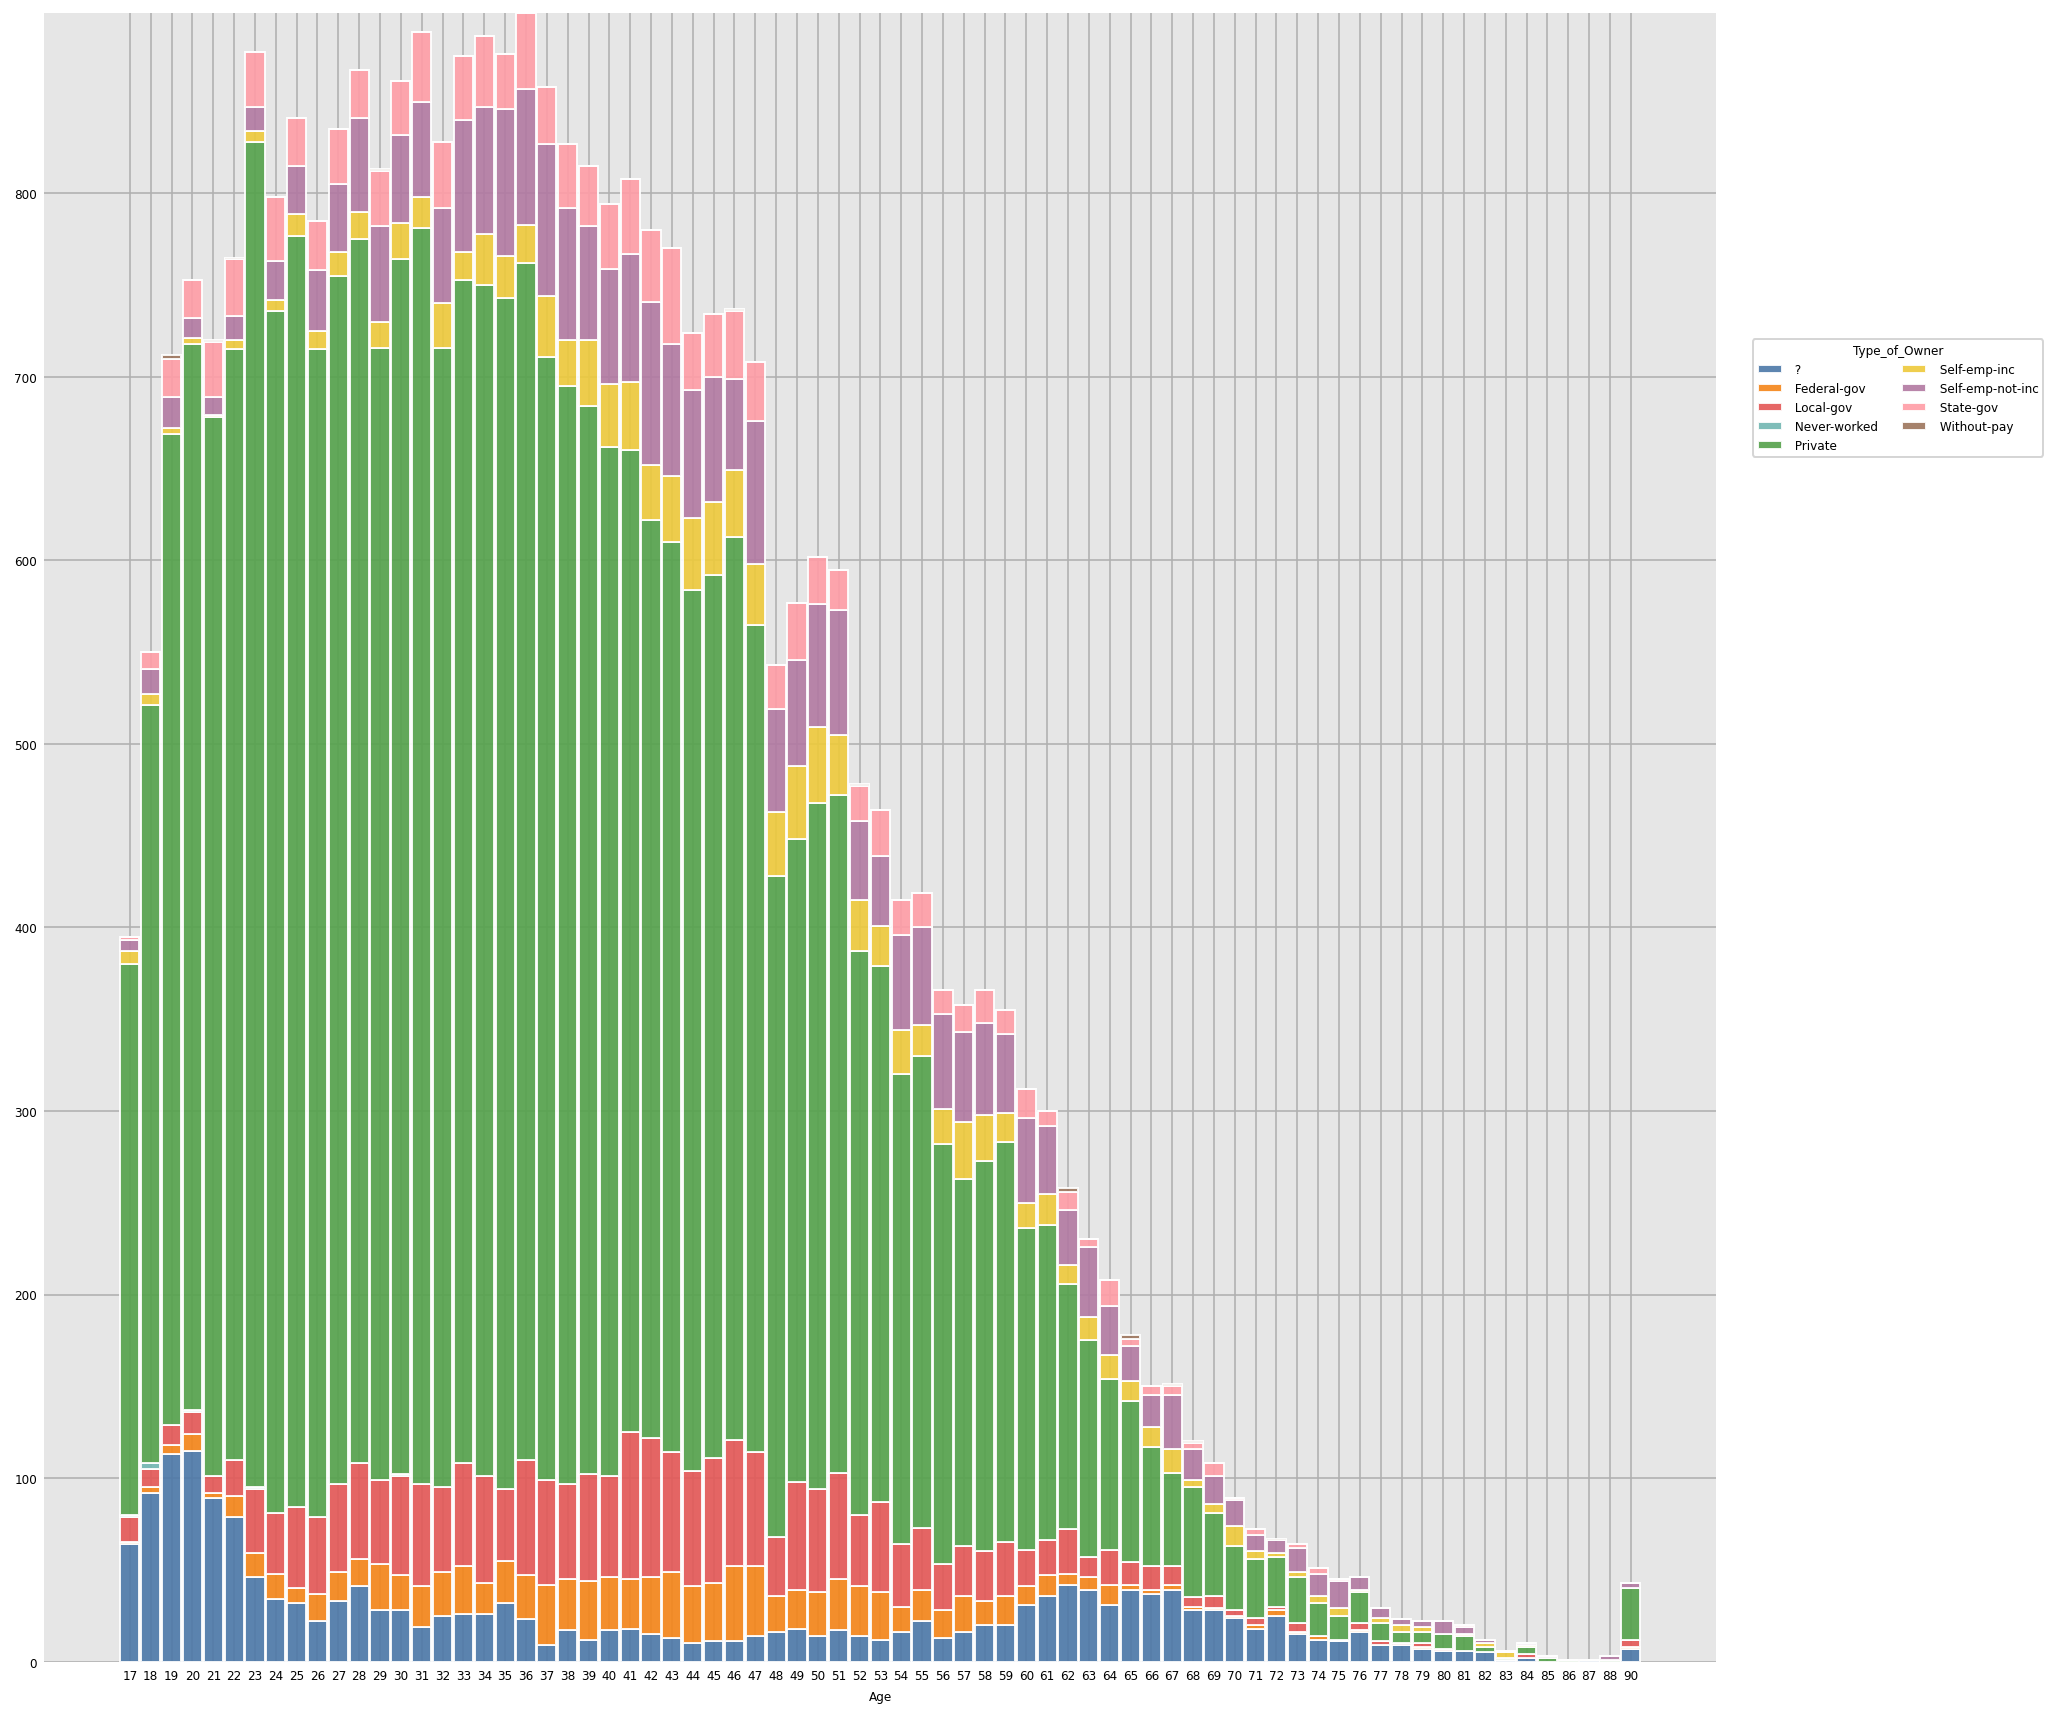

In [30]:
# Importing the Dexplot

import dexplot as dxp

dxp.count(
    val="Age",
    data = df,
    split="Type_of_Owner",
    stacked = True,
    figsize=(12,12),
    xlabel = "Age of the Working Class People")

From the above graph we can see that how the Job Type of the People of Different Age varies, Though most people are involved in Private Job Type in all the age group but Private Job is predominantly occupied by the people in the age group of 17-60 years old people

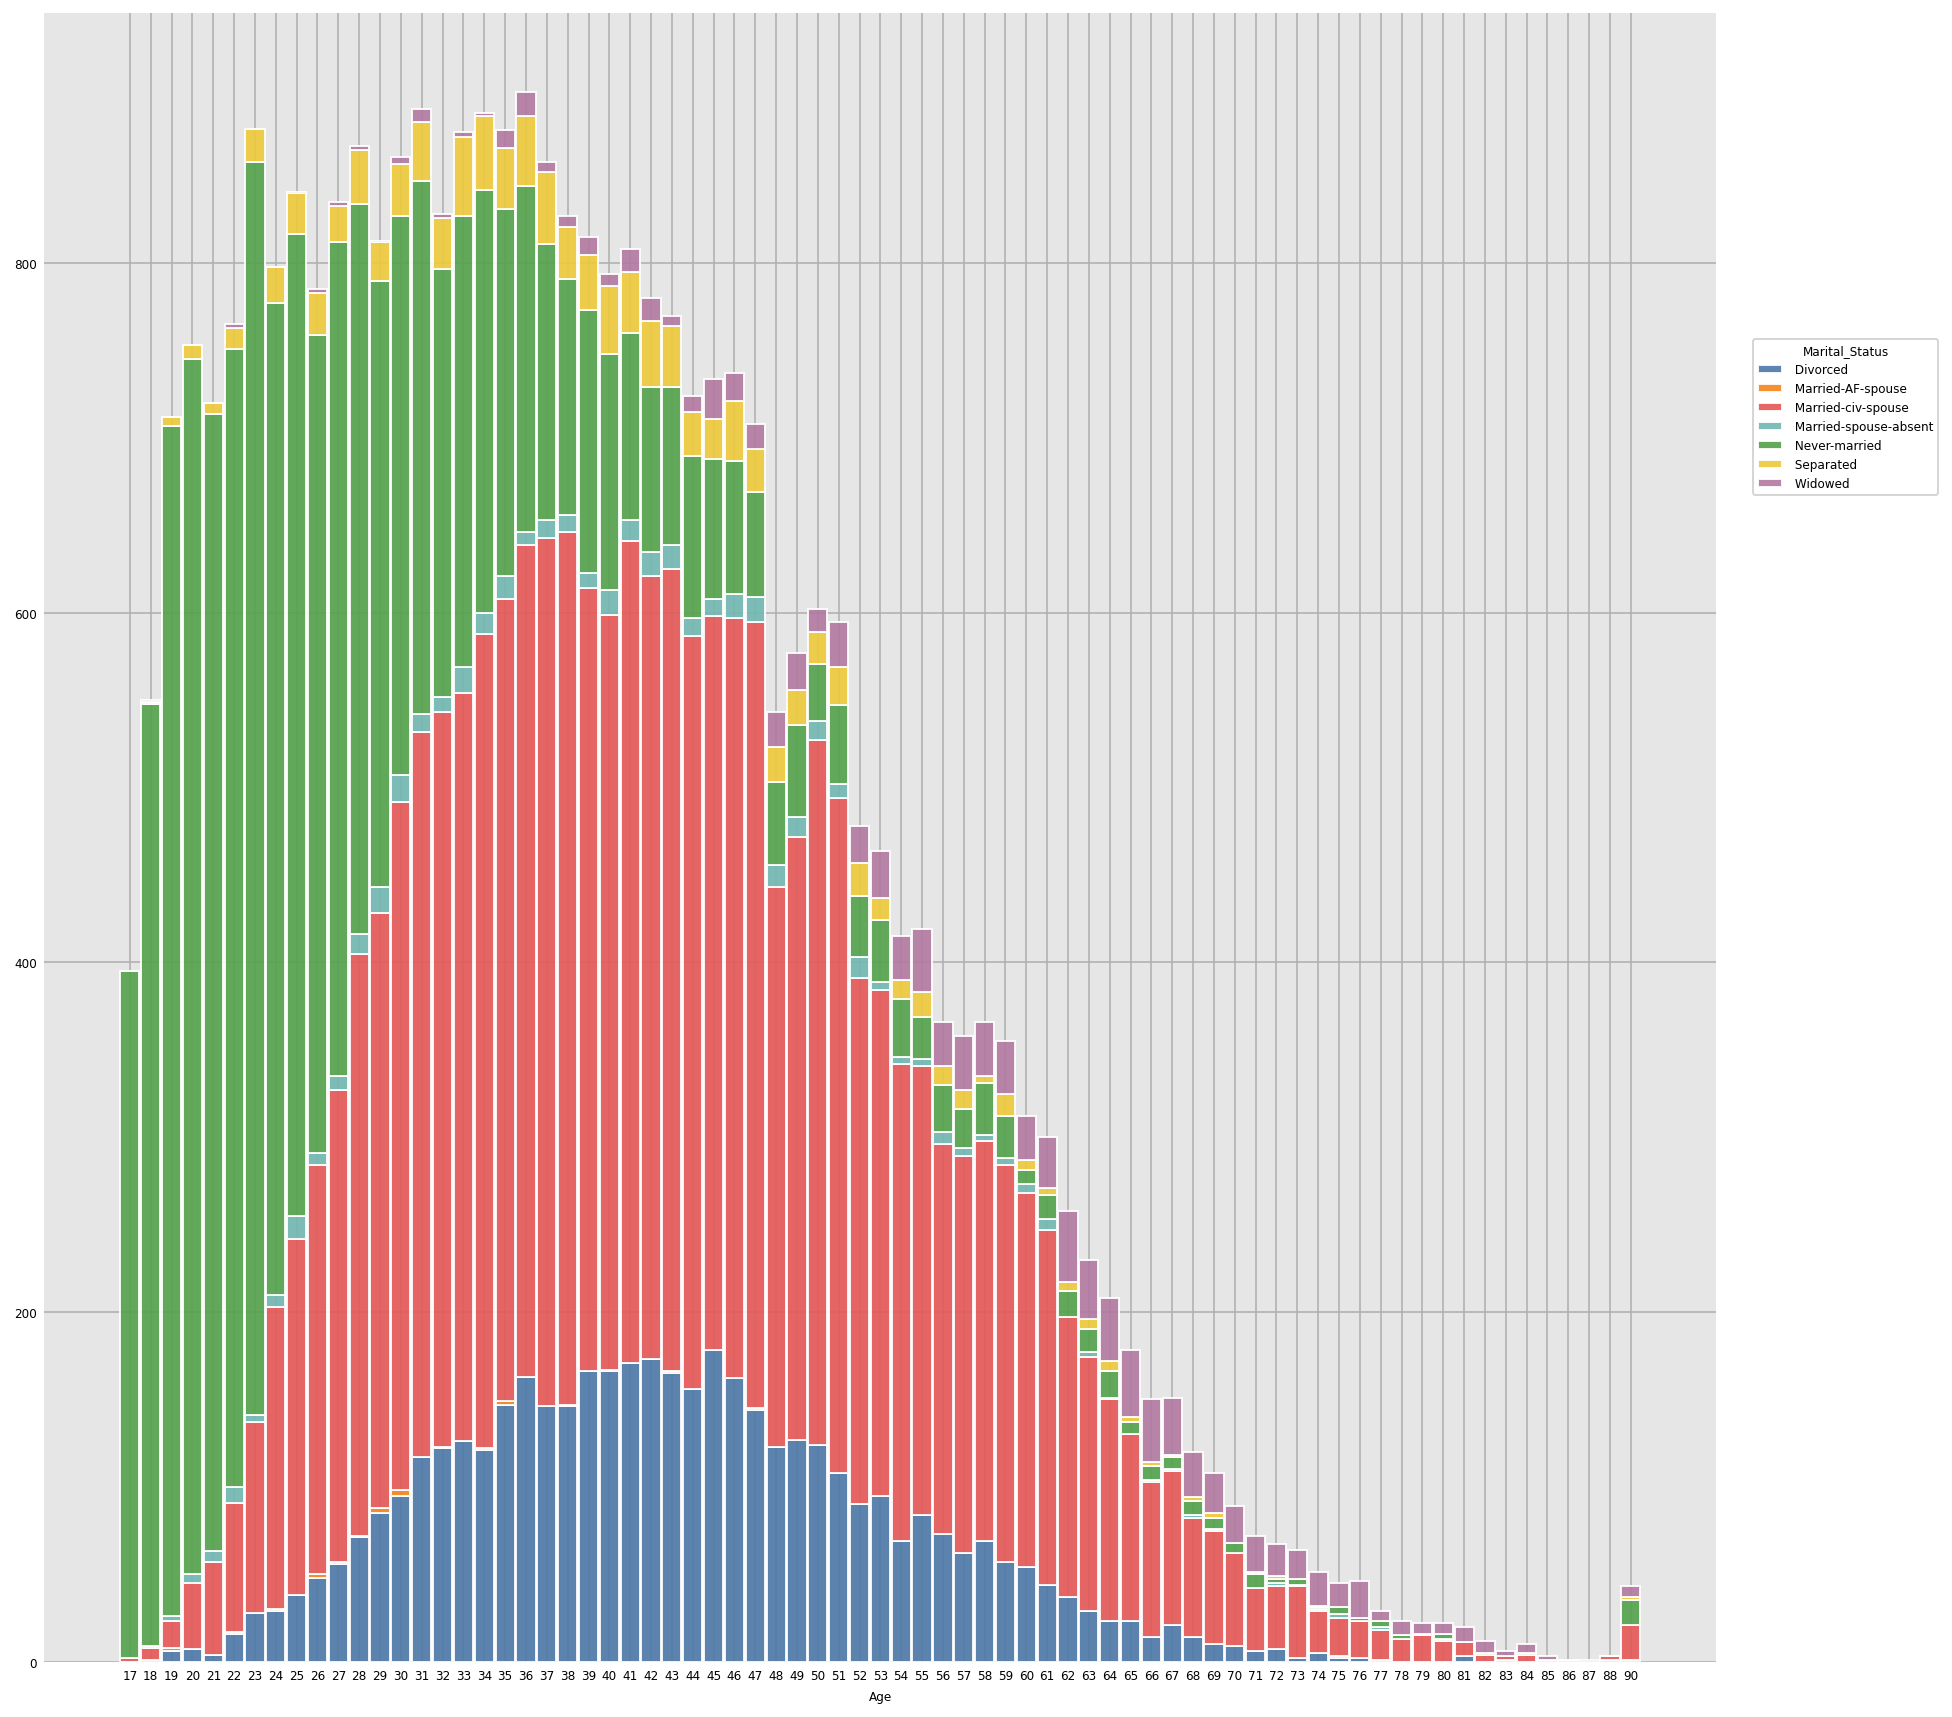

In [31]:
dxp.count(
    val="Age",
    data = df,
    split="Marital_Status",
    stacked = True,
    figsize=(12,12),
    xlabel = "Age of the Working Class People")

From the above data it is clear that people falling in the age-group of 17-30 are unmarried and people falling in the age-group of 30-65 years are predominantly married. A large portion of people in the age-group 30-55 years are divorced.

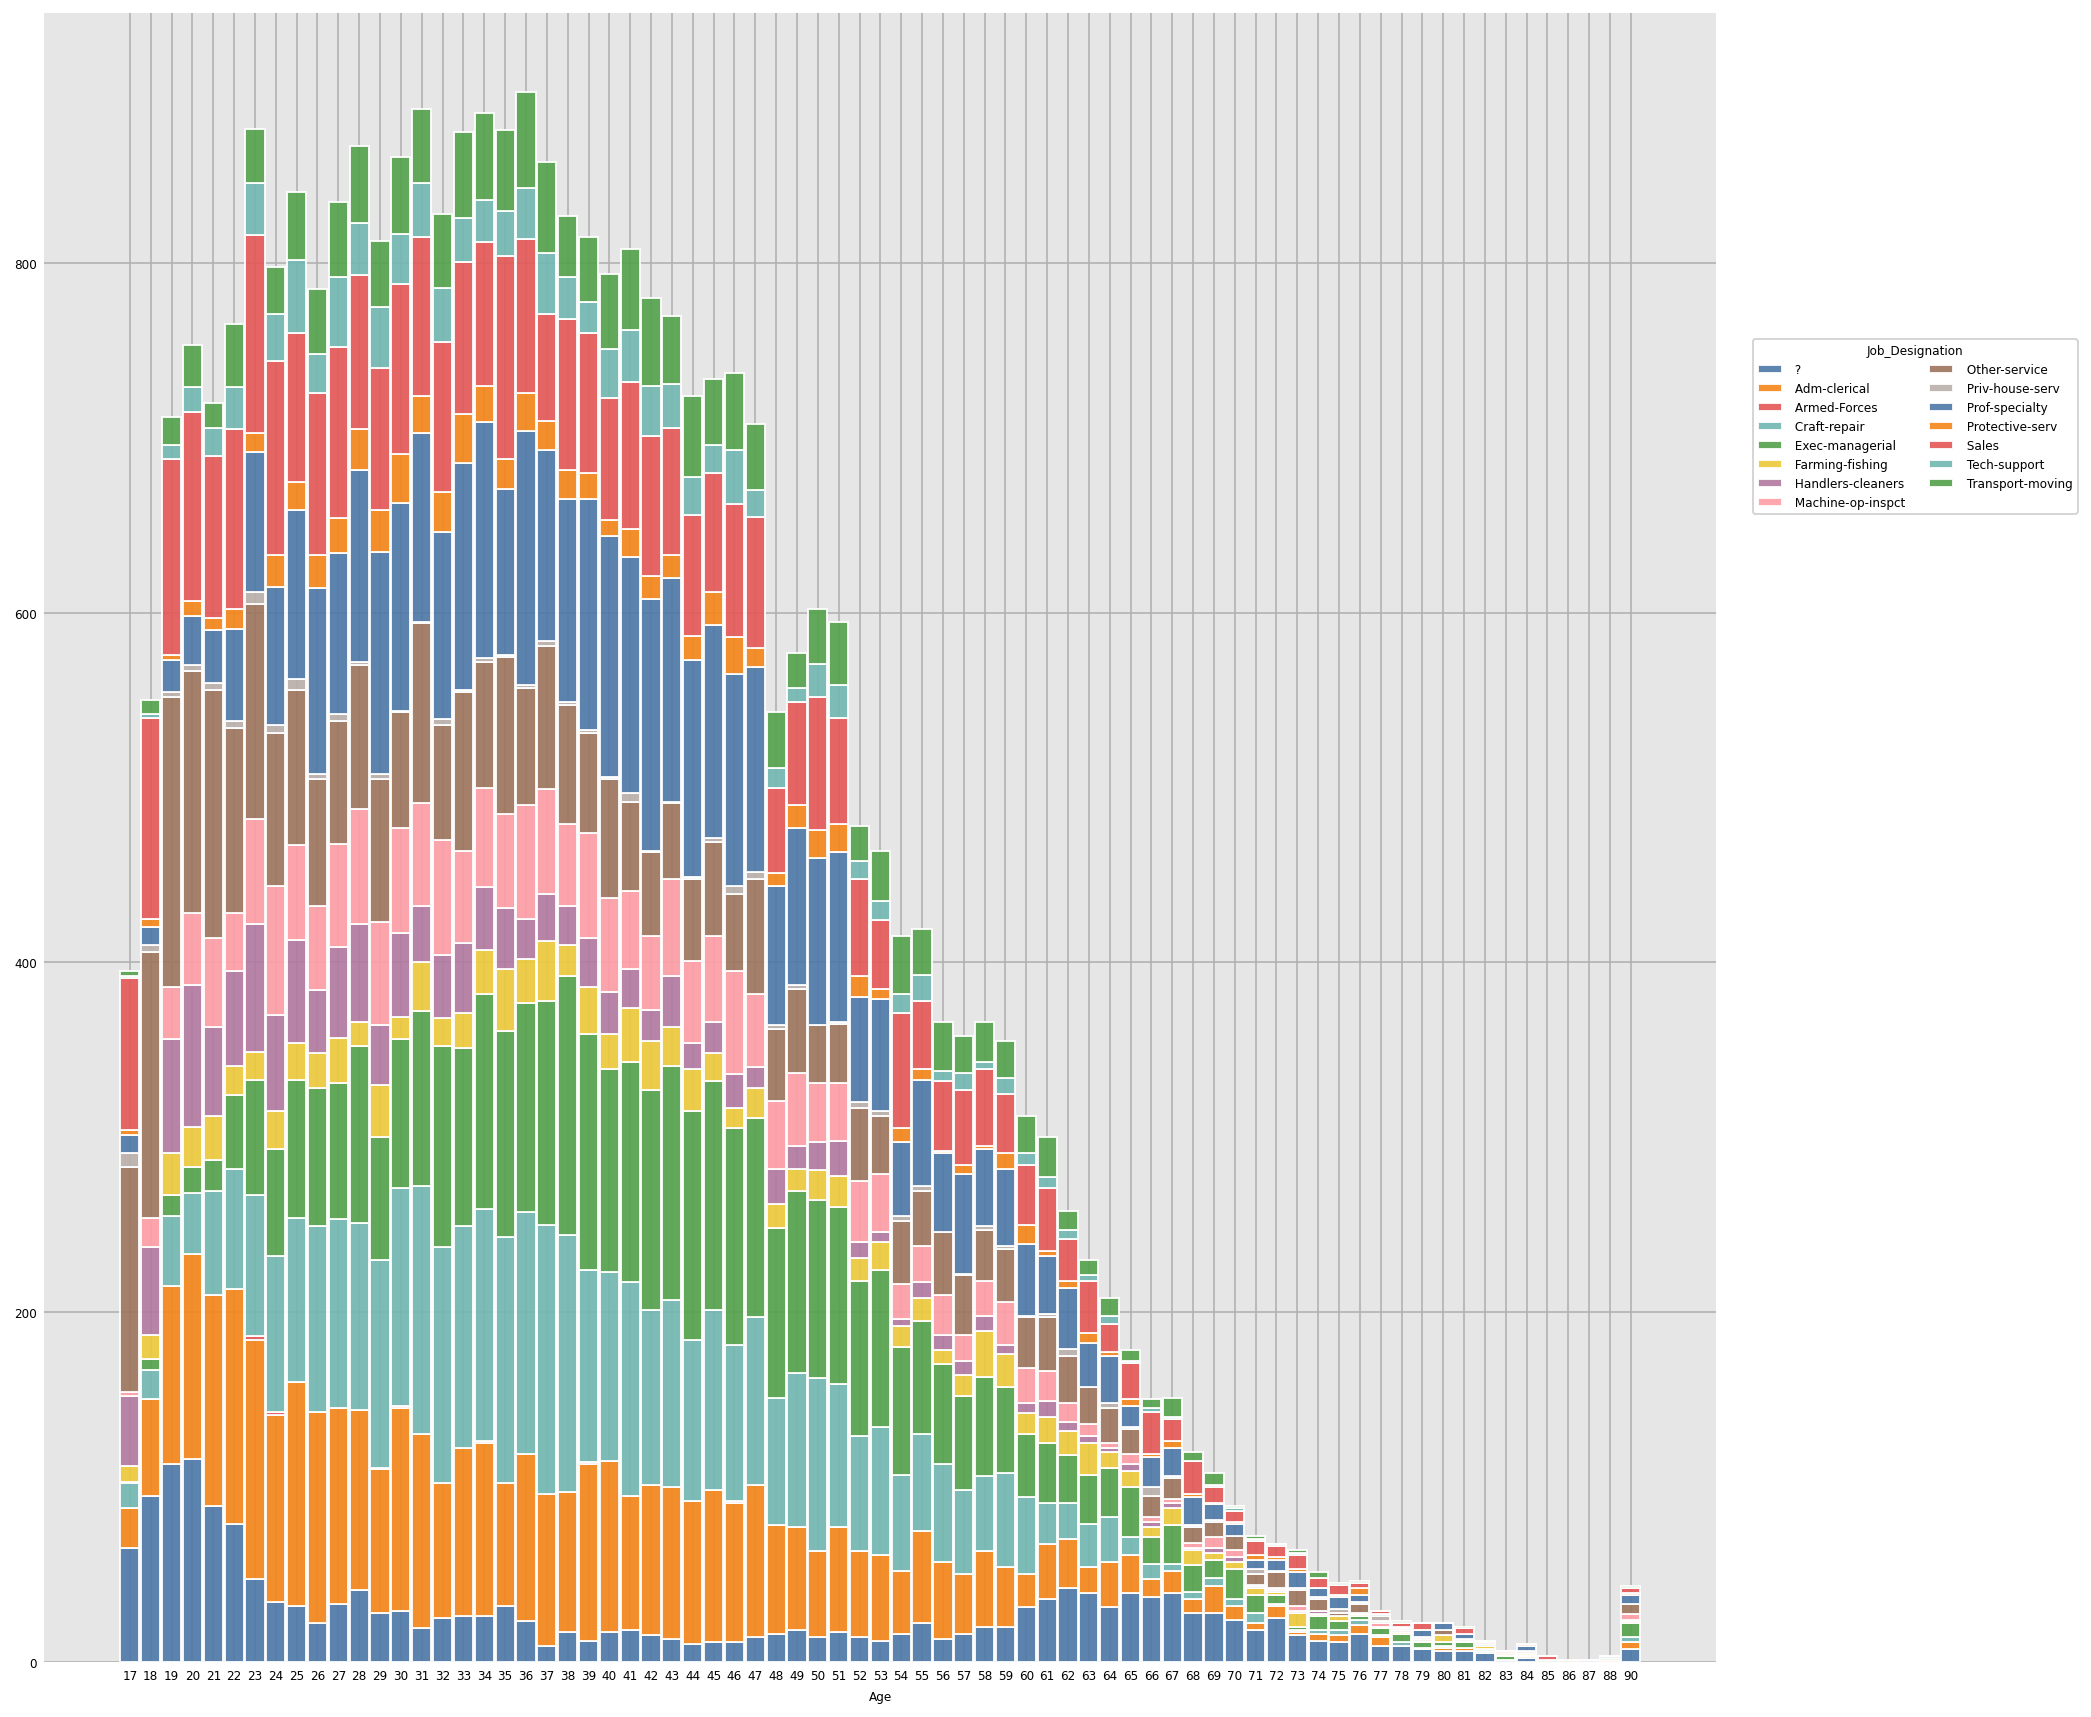

In [32]:
dxp.count(
    val="Age",
    data = df,
    split="Job_Designation",
    stacked = True,
    figsize=(12,12),
    xlabel = "Age of the Working Class People")

From the above graph we can see that how the Age and Job-Profile of people varies

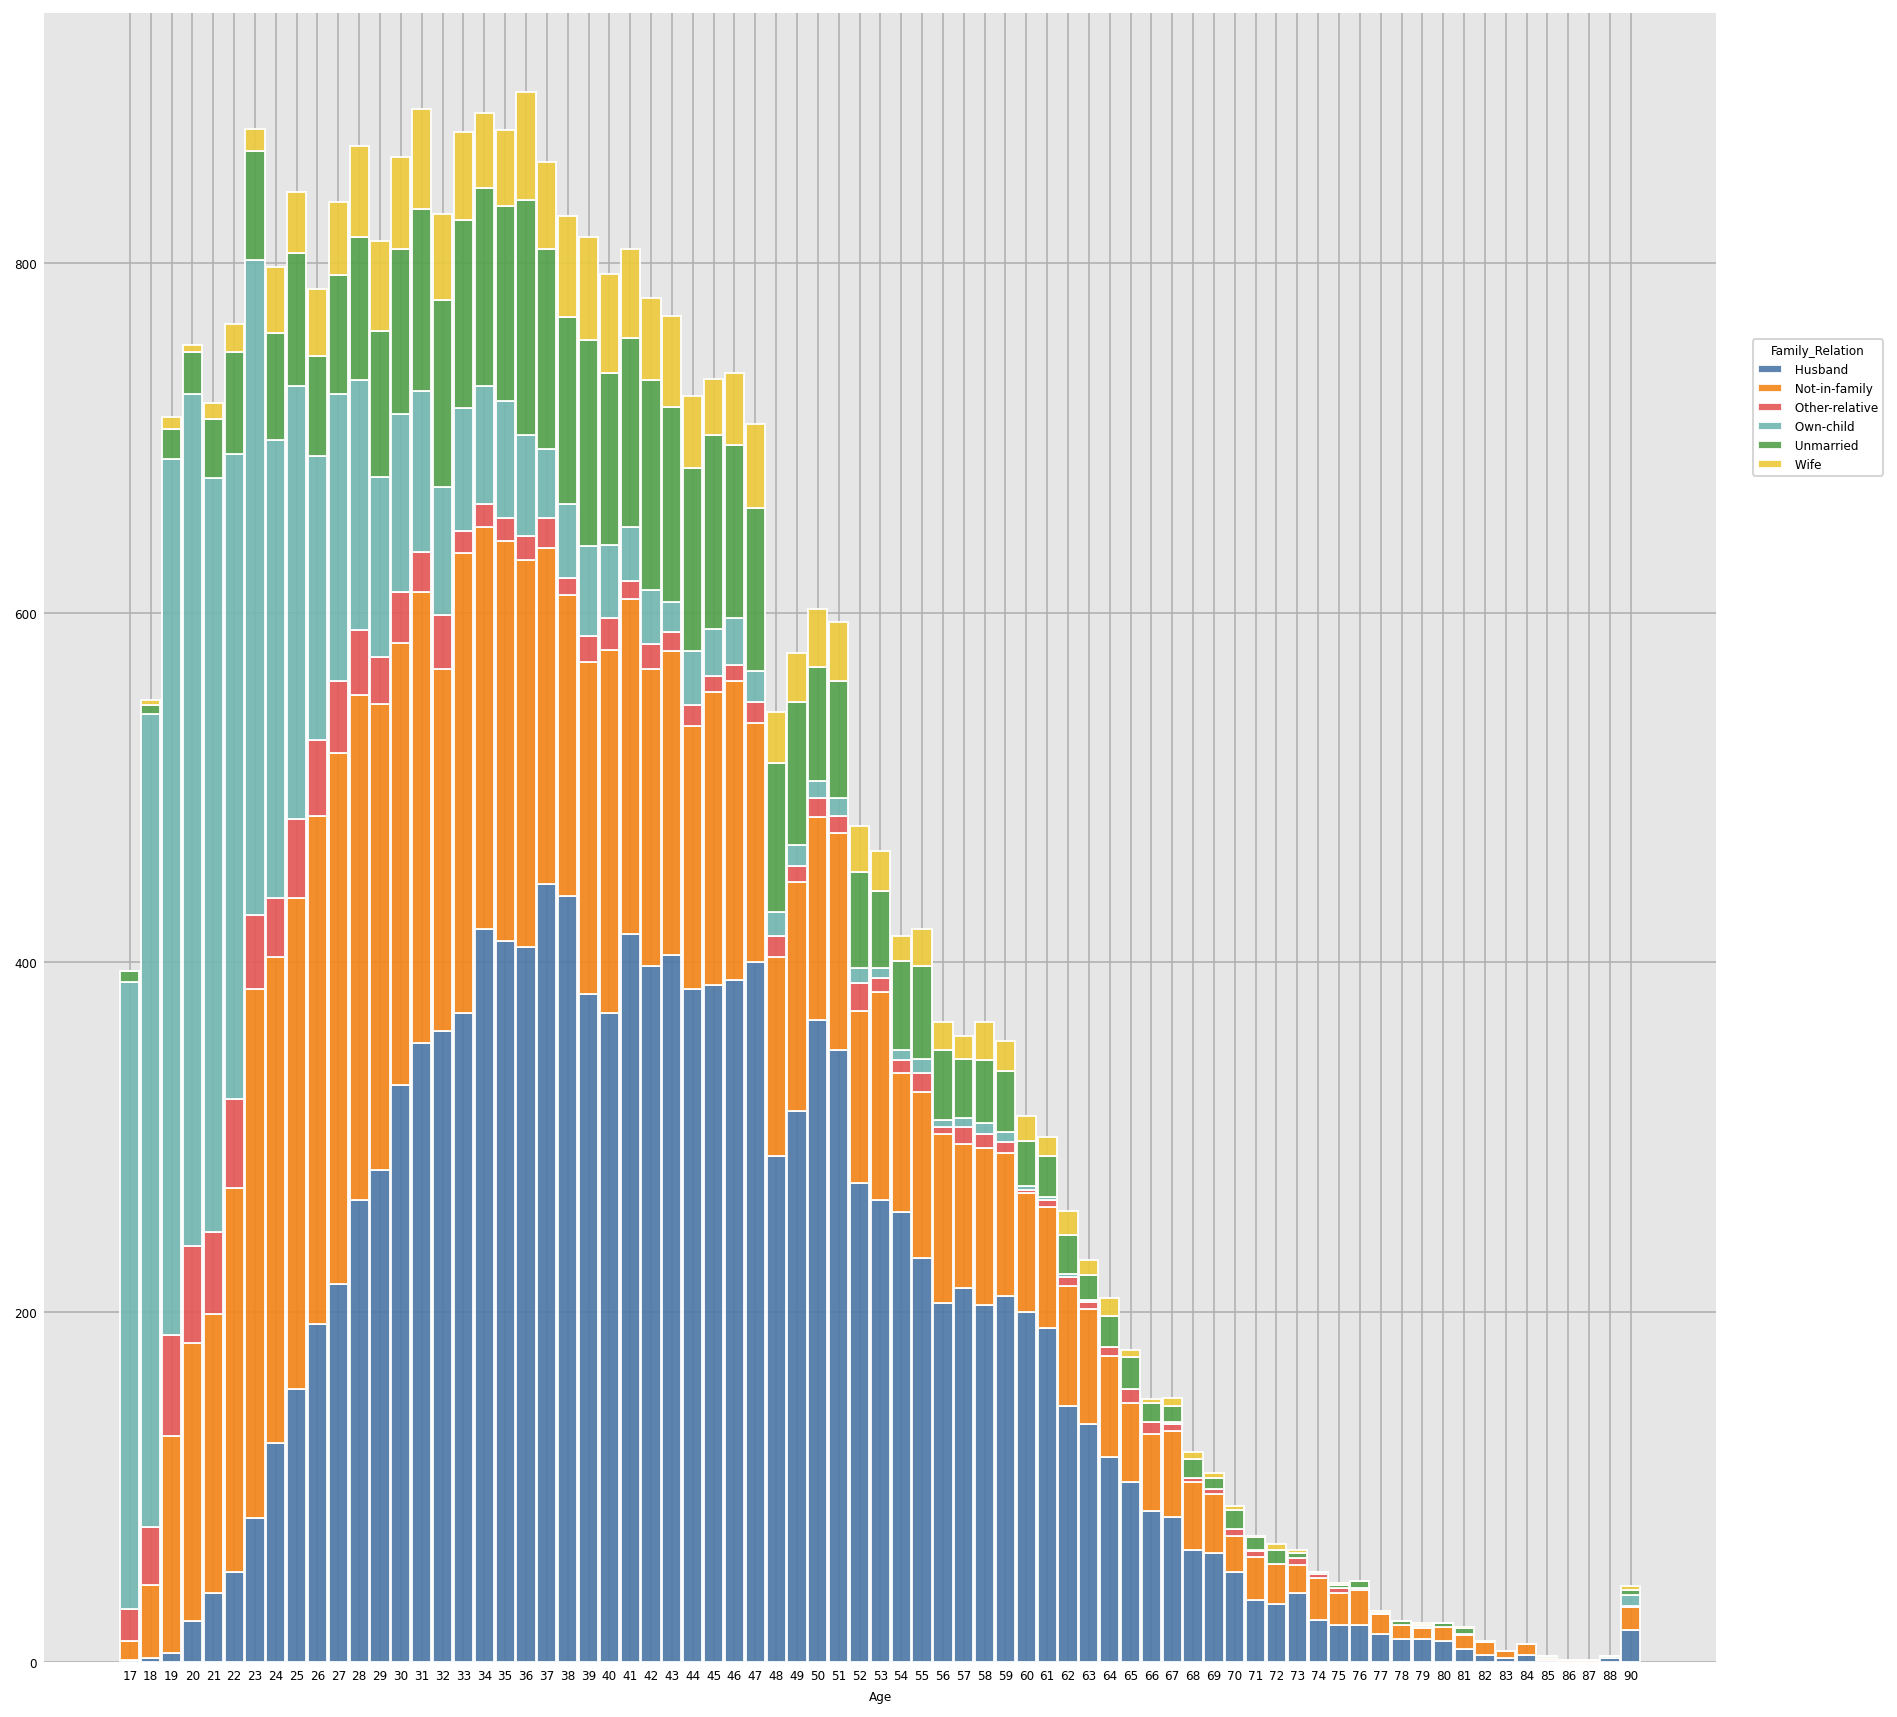

In [33]:
dxp.count(
    val="Age",
    data = df,
    split="Family_Relation",
    stacked = True,
    figsize=(12,12),
    xlabel = "Age of the Working Class People")

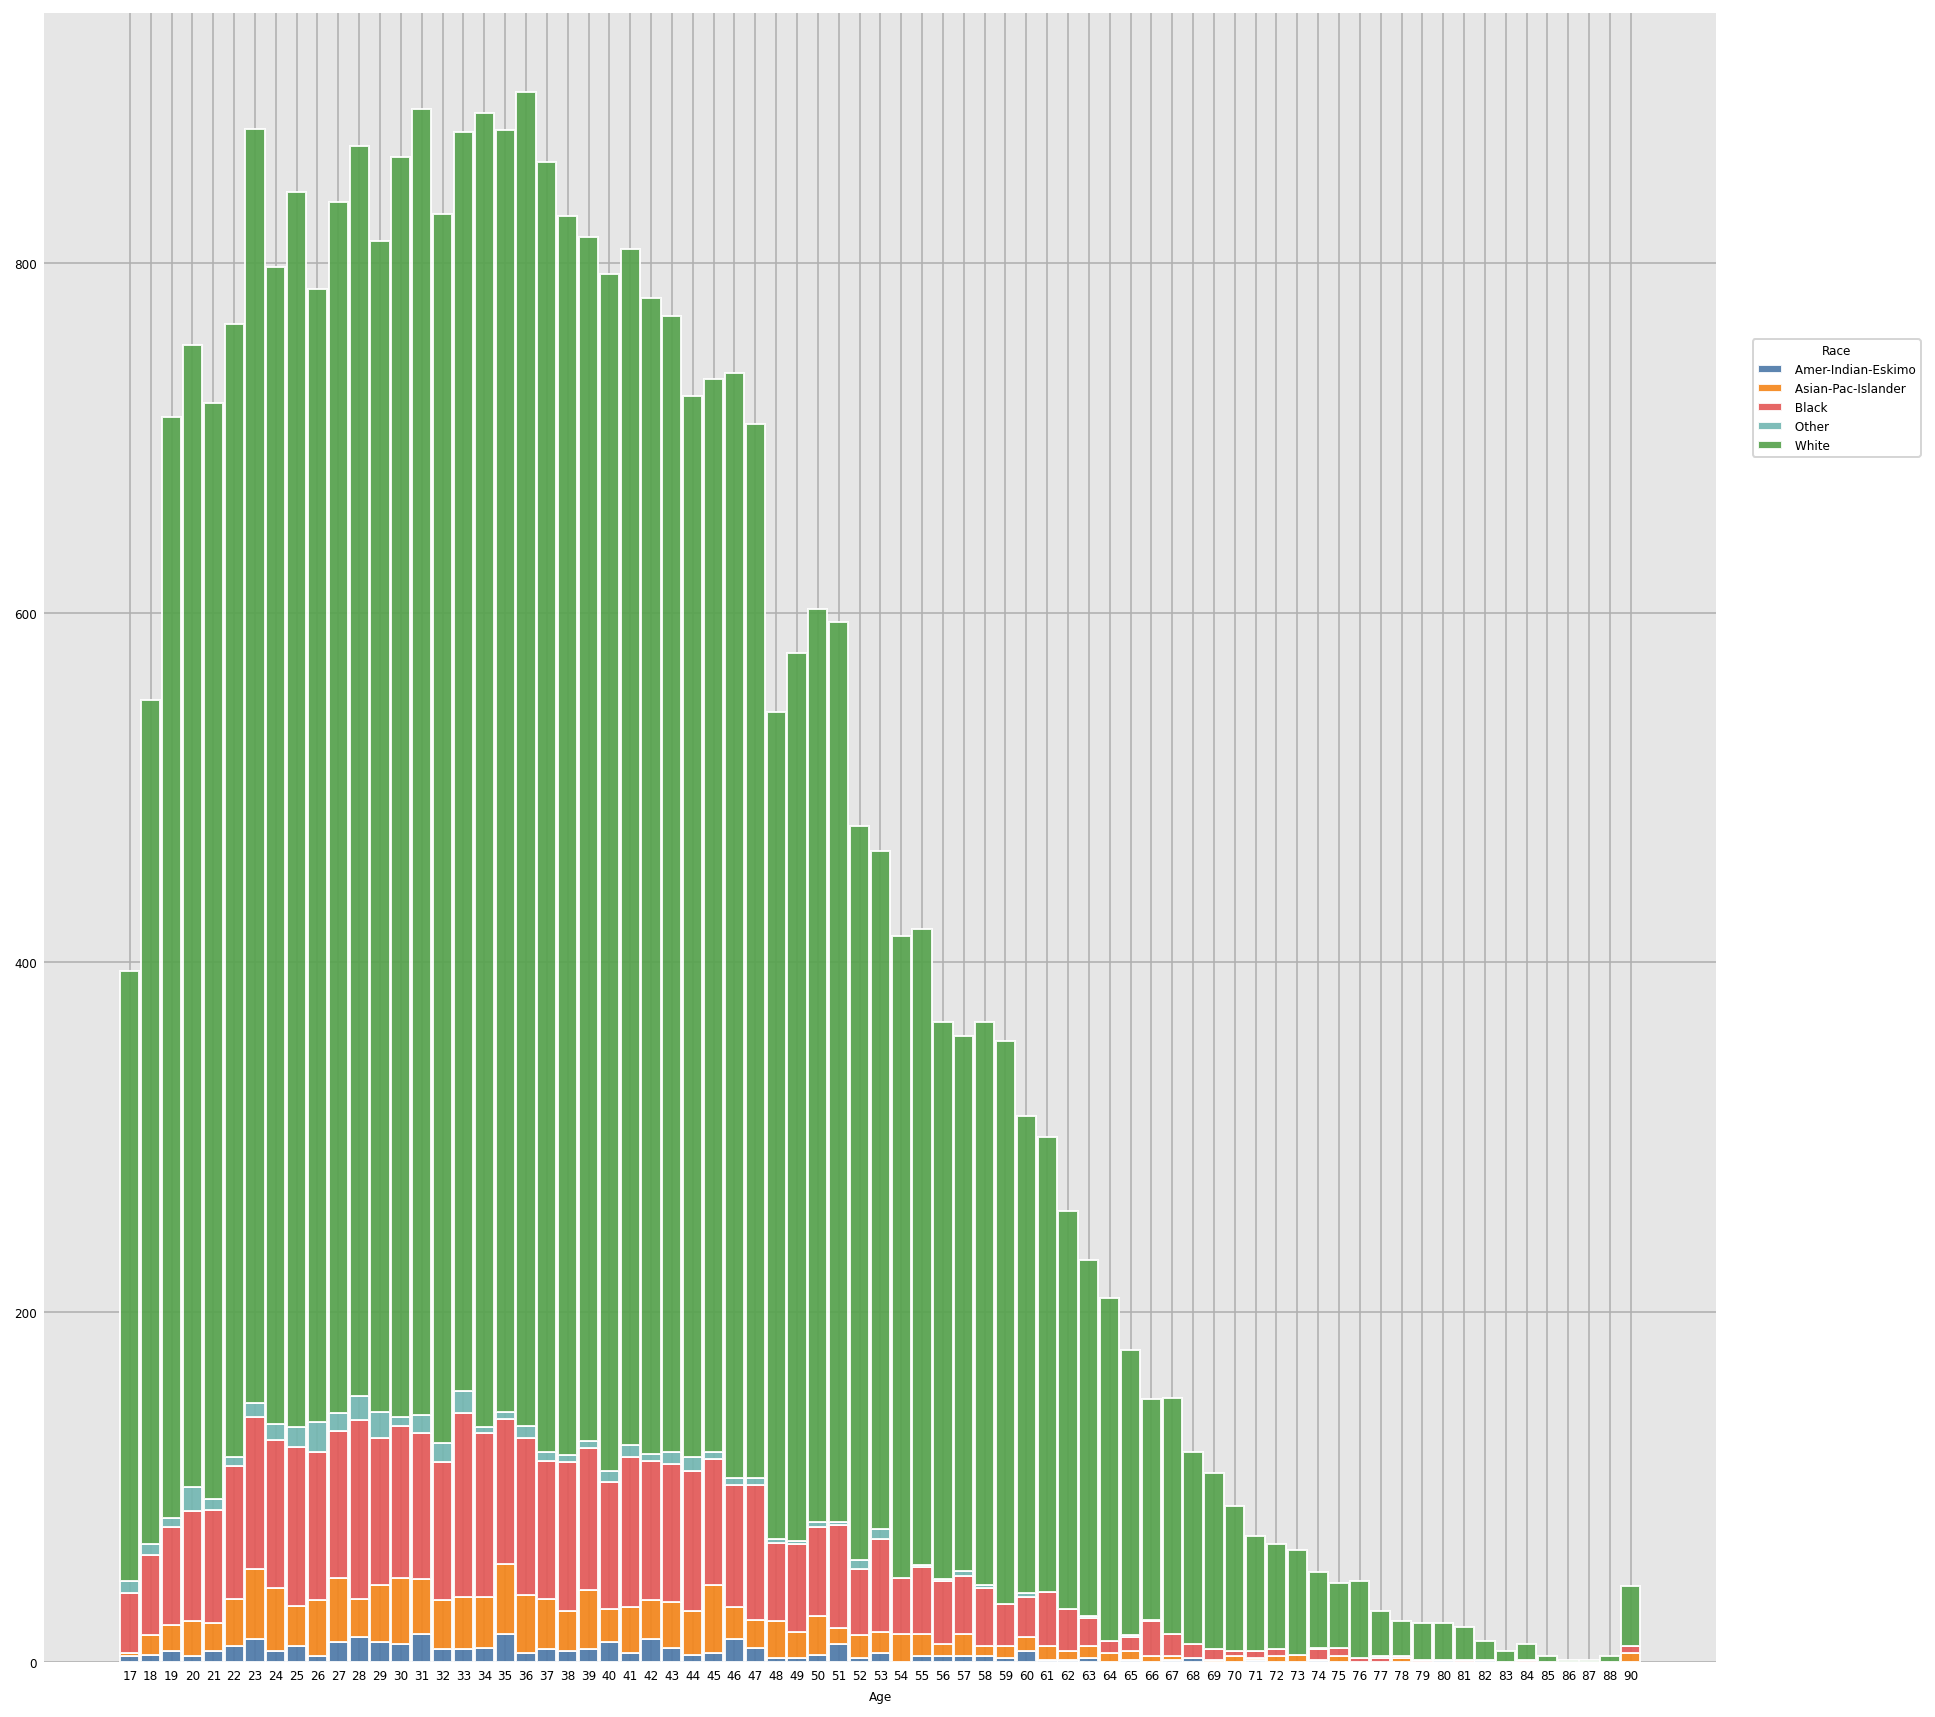

In [34]:
dxp.count(
    val="Age",
    data = df,
    split="Race",
    stacked = True,
    figsize=(12,12),
    xlabel = "Age of the Working Class People")

From the above graph it is clear that most people in any age group are predominantly white

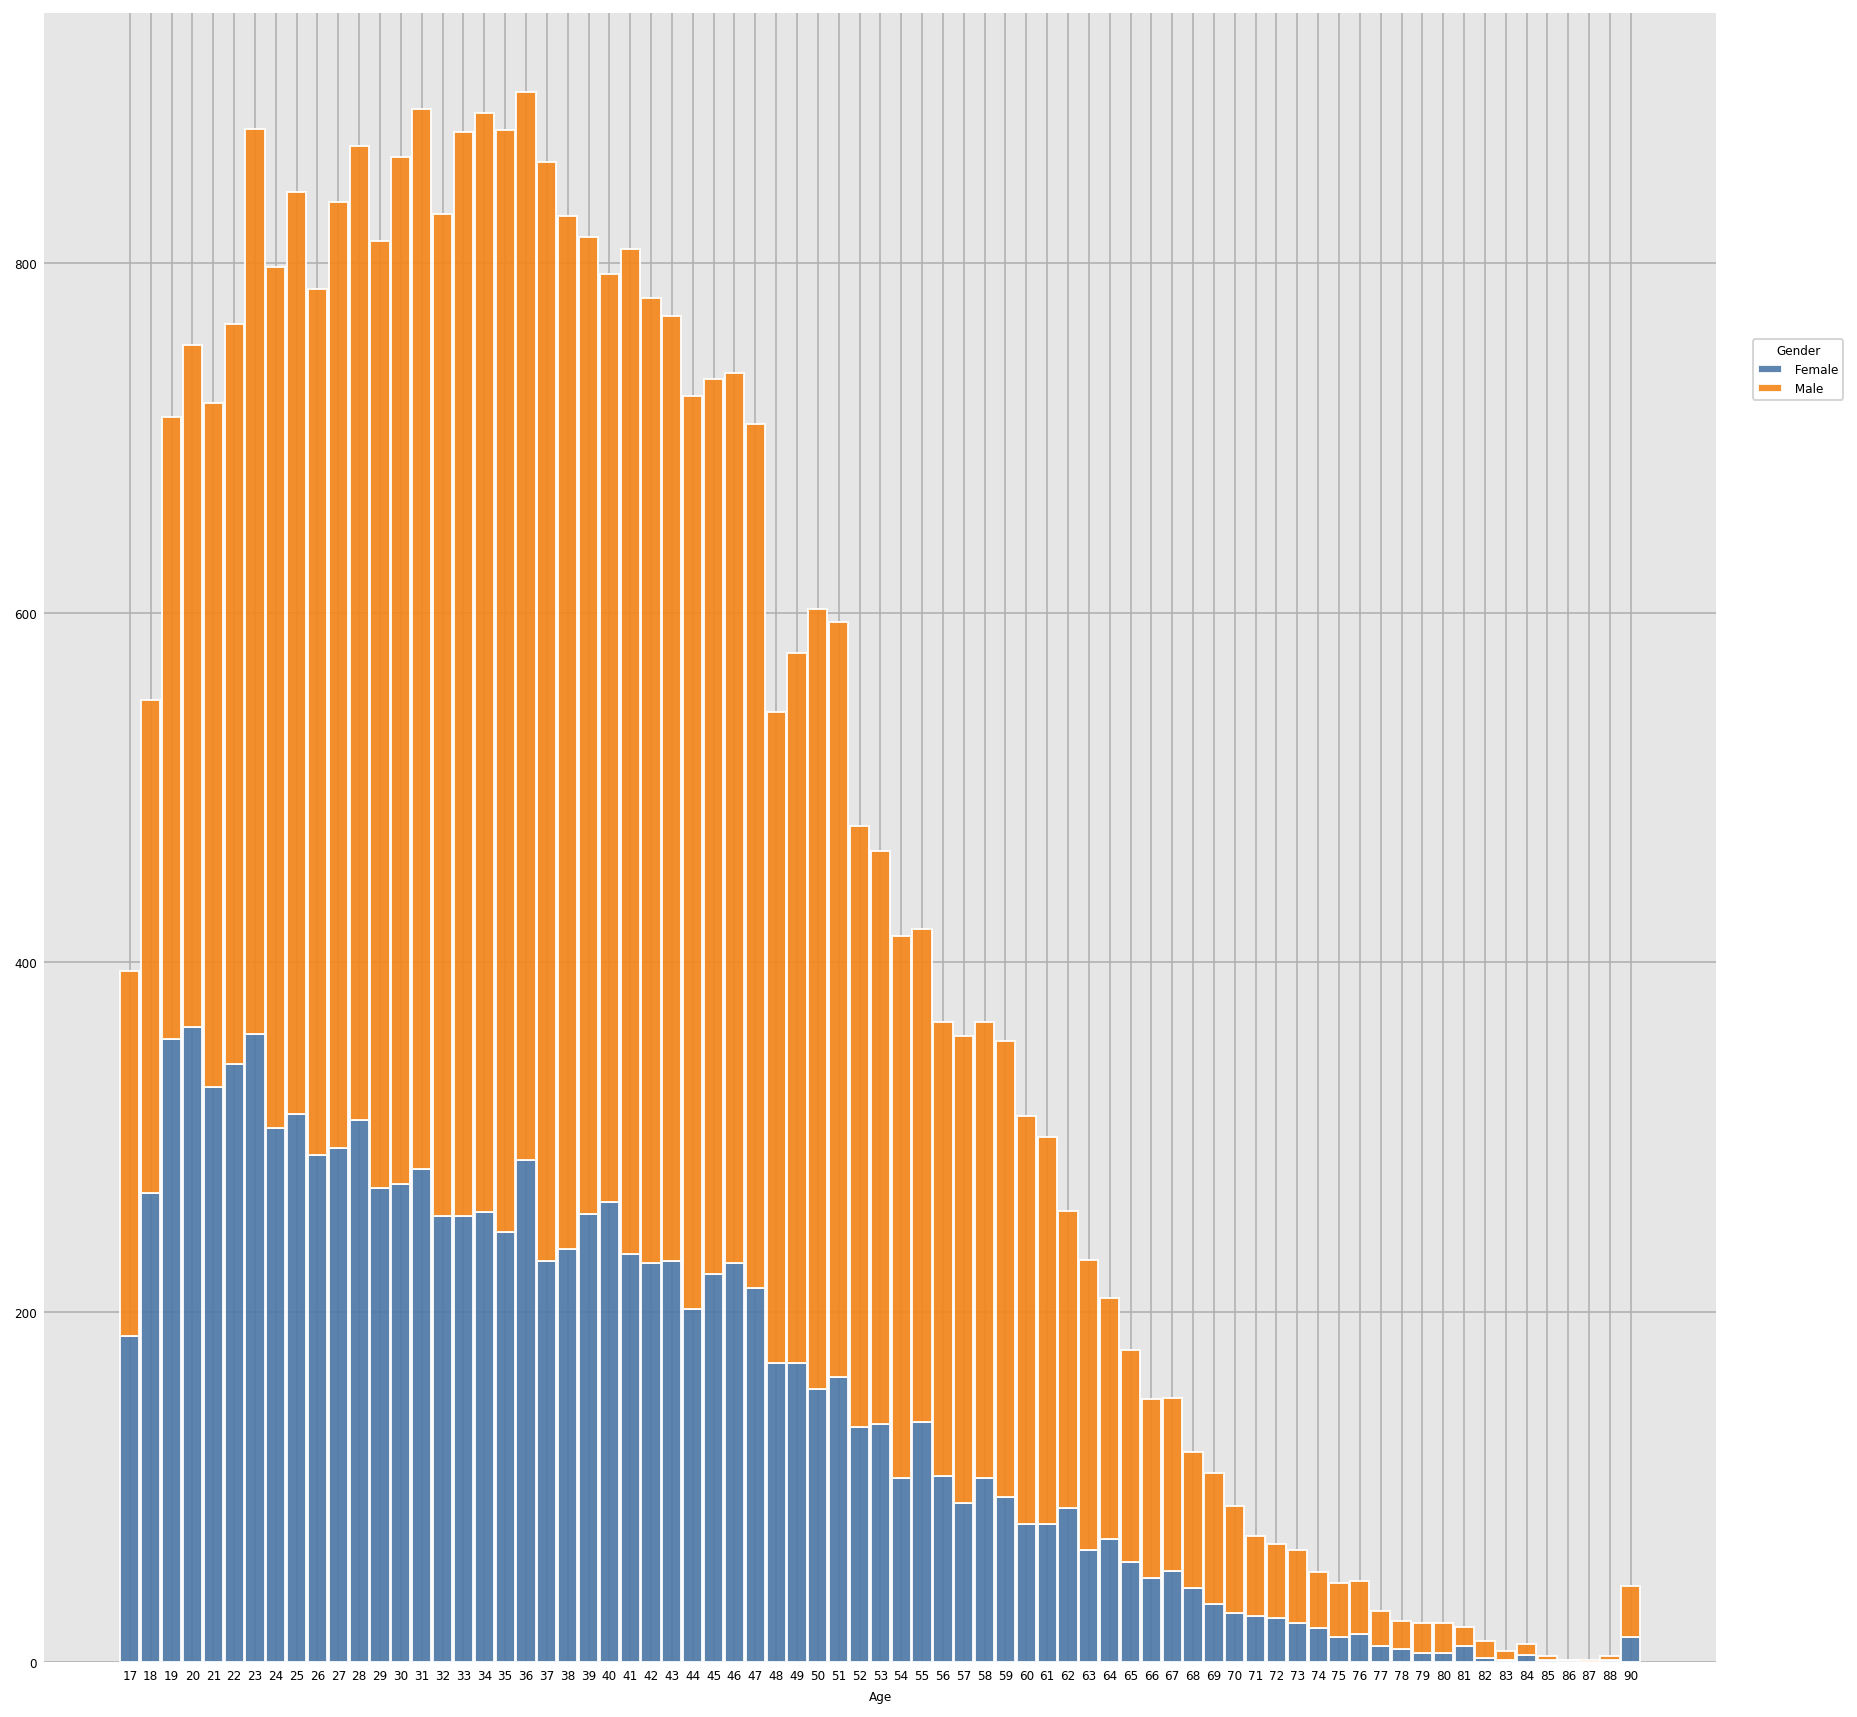

In [35]:
dxp.count(
    val="Age",
    data = df,
    split="Gender",
    stacked = True,
    figsize=(12,12),
    xlabel = "Age of the Working Class People")

It's clear from the above graph that most working female fall in the age-group of 17-55 and infact they have started working at early age while most male start weorking from age-group of 23 onwards

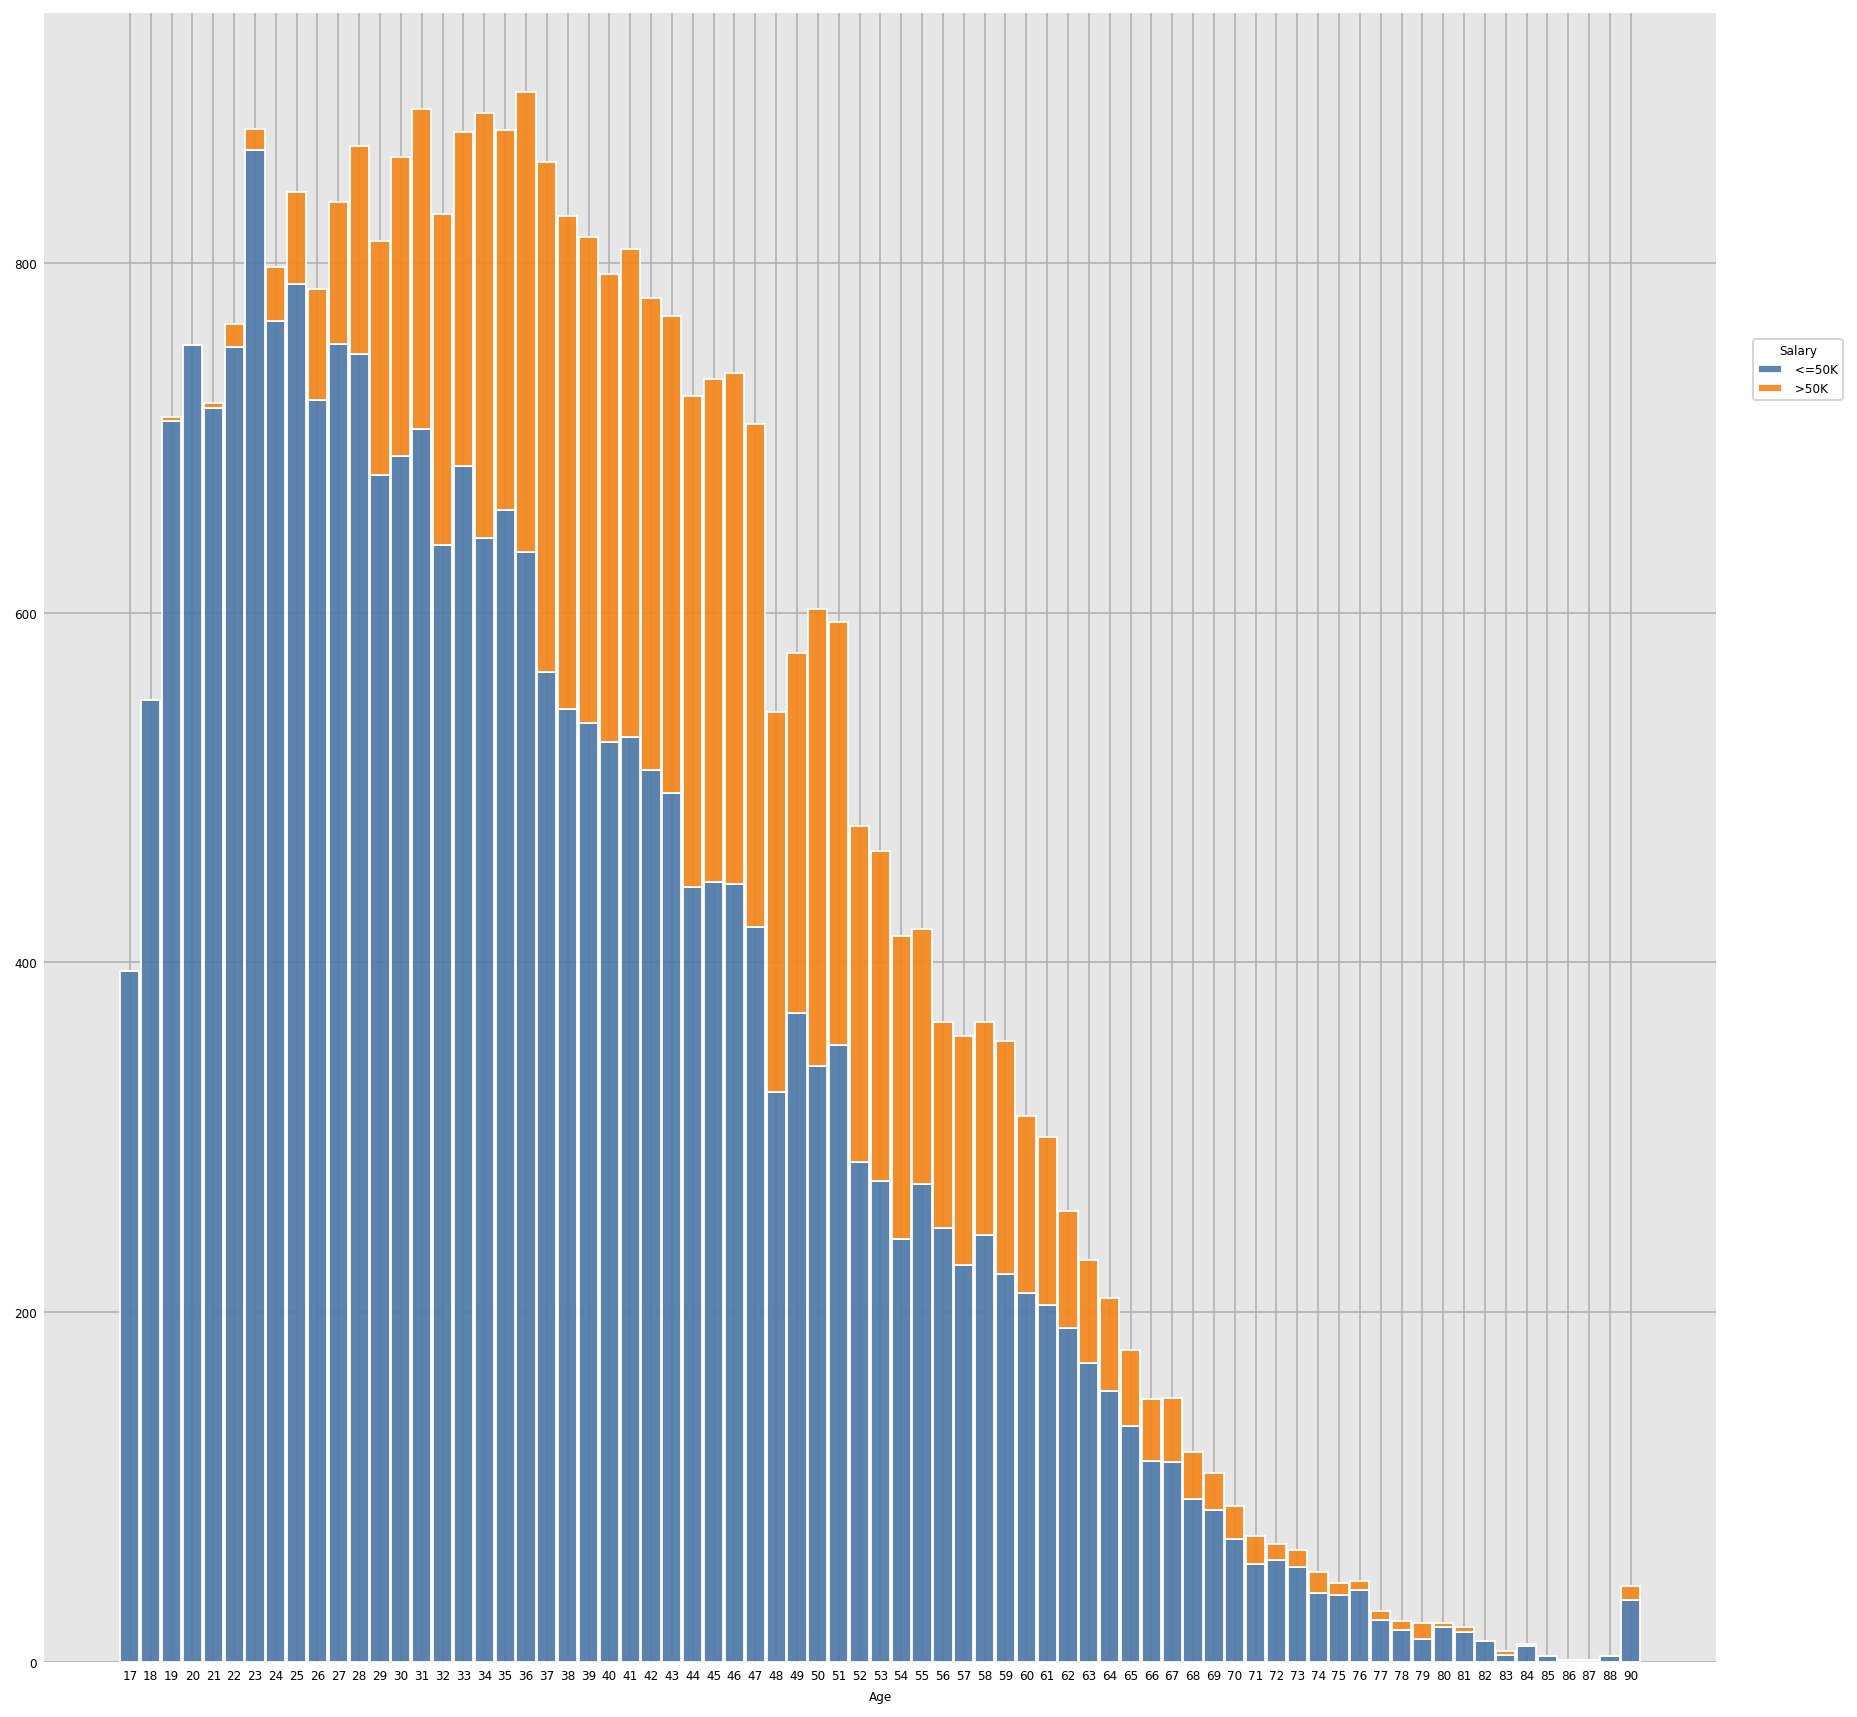

In [36]:
dxp.count(
    val="Age",
    data = df,
    split="Salary",
    stacked = True,
    figsize=(12,12),
    xlabel = "Age of the Working Class People")

It is obvious from the graph that with the passes of age tendency to get more salaries increases in general

### Splitting the Data into Train and Test Set

In [37]:
X = df.drop(['Age', 'id', 'Salary', 'Country', 'Family_Relation'], axis = 1)
y = df['Salary']

In [38]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [39]:
print("The size of training input is", X_train.shape)
print("The size of training output is", y_train.shape)
print("The size of testing input is", X_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (26048, 7)
The size of training output is (26048,)
The size of testing input is (6512, 7)
The size of testing output is (6512,)


# Feature Engineering

In [40]:
# Importing the category Encoders
import category_encoders as ce

We are dealing with categoriacl data, we use category Encoders to one-hot encode dataset features

In [41]:
X_train.head()

Type_of_Owner      Education  No_of_Projects_Done       Marital_Status  \
24639       Private           12th                    8        Never-married   
5514      State-gov   Some-college                   10        Never-married   
19777       Private   Some-college                   10              Widowed   
10781       Private        HS-grad                    9        Never-married   
32239       Private      Assoc-voc                   11   Married-civ-spouse   

          Job_Designation    Race   Gender  
24639   Machine-op-inspct   White     Male  
5514         Adm-clerical   White   Female  
19777     Exec-managerial   White   Female  
10781        Tech-support   Black     Male  
32239     Farming-fishing   White     Male

In [42]:
encoder = ce.OrdinalEncoder(cols=['Education', 'Type_of_Owner', 'Gender', 'Job_Designation',
                                   'Marital_Status', 'No_of_Projects_Done', 'Race'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

/home/daryl-loyck/anaconda3/envs/dlwithpy/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



In [43]:
# Now lets see how the Data looks like after doing the one-hot encoding

X_train.head()

Type_of_Owner  Education  No_of_Projects_Done  Marital_Status  \
24639              1          1                    1               1   
5514               2          2                    2               1   
19777              1          2                    2               2   
10781              1          3                    3               1   
32239              1          4                    4               3   

       Job_Designation  Race  Gender  
24639                1     1       1  
5514                 2     1       2  
19777                3     1       2  
10781                4     2       1  
32239                5     1       1

In [44]:
X_test.head()

Type_of_Owner  Education  No_of_Projects_Done  Marital_Status  \
14160              1          3                    3               4   
27047              2          3                    3               3   
28867              1          5                    5               3   
5667               1         12                   12               1   
7827               1          8                    8               2   

       Job_Designation  Race  Gender  
14160                2     1       2  
27047                3     1       2  
28867                3     2       1  
5667                 6     1       1  
7827                 6     1       2

In [45]:
y_train.head()

24639     <=50K
5514      <=50K
19777     <=50K
10781     <=50K
32239     <=50K
Name: Salary, dtype: object

In [46]:
y_test.head()

14160     <=50K
27047     <=50K
28867      >50K
5667       >50K
7827      <=50K
Name: Salary, dtype: object

# Model Building

## Decision Tree Classifier

Decision Tree with Criterion Entropy

In [47]:
# Importing DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=0)

# Fitting/Training the Model
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [48]:
# Predicting Test set results using the Criterion Gini Index
y_pred = clf.predict(X_test)

In [49]:
# finding the training and testing accuracy
print("Training Accuracy: ",clf.score(X_train, y_train))
print("Testing Accuracy: ", clf.score(X_test, y_test))

Training Accuracy:  0.7867782555282555
Testing Accuracy:  0.7831695331695332


From the above output we can see that there is a slight variation in the train set and test accuracy

In [50]:
from sklearn.metrics import confusion_matrix

# printing the confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4093  819]
 [ 593 1007]]


In [51]:
# Printing the scores on training and test set

print('Training set Score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set Score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set Score: 0.7868
Test set Score: 0.7832


## Logistic regression

In [52]:
# Standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [53]:
# Importing the required Libraries

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Defining model

model = LogisticRegression()

model.fit(X_train, y_train)

# Predicting the values for x-test
y_pred = model.predict(X_test)

In [54]:
# finding the training and testing accuracy
print("Training Accuracy: ",model.score(X_train, y_train))
print("Testing Accuracy: ", model.score(X_test, y_test))

Training Accuracy:  0.7495777027027027
Testing Accuracy:  0.7446253071253072


## Random Forest

In [55]:
# importing the Libraris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Creating a model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predicting the value for X_test
y_pred = model.predict(X_test)

In [56]:
# finding the training and testing accuracy
print("Training Accuracy: ",model.score(X_train, y_train))
print("Testing Accuracy: ", model.score(X_test, y_test))

Training Accuracy:  0.855382371007371
Testing Accuracy:  0.8223280098280098


In [57]:
# printing the confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4464  448]
 [ 709  891]]


## KNeighborsClassifier

In [58]:
from sklearn.neighbors import KNeighborsClassifier

# creating a model
model = KNeighborsClassifier(n_neighbors = 5)

# feeding the training data into the model
model.fit(X_train, y_train)

# predicting the values for x-test
y_pred = model.predict(X_test)

In [59]:
# finding the training and testing accuracy
print("Training Accuracy: ",model.score(X_train, y_train))
print("Testing Accuracy: ", model.score(X_test, y_test))

Training Accuracy:  0.8260135135135135
Testing Accuracy:  0.8042076167076168


In [60]:
# printing the confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4499  413]
 [ 862  738]]


Random Forest and KNeighborsClassifier models offer the best resulsts